<a href="https://colab.research.google.com/github/rani-sikdar/GenAI-complete-course-codes/blob/main/text_classification_in_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title import libraries and load dataset
from sklearn.datasets import fetch_20newsgroups
import pandas as pd

# Load dataset
newsgroups = fetch_20newsgroups(subset='all', categories=['rec.sport.baseball', 'sci.space'], shuffle=True, random_state=42)
data = newsgroups.data
target = newsgroups.target

# Create a DataFrame for easy manipulation
df = pd.DataFrame({'text': data, 'label': target})
df.head()

,text,label
0,From: mss@netcom.com (Mark Singer)\nSubject: R...,0
1,From: cuz@chaos.cs.brandeis.edu (Cousin It)\nS...,0
2,From: J019800@LMSC5.IS.LMSC.LOCKHEED.COM\nSubj...,0
3,From: tedward@cs.cornell.edu (Edward [Ted] Fis...,0
4,From: snichols@adobe.com (Sherri Nichols)\nSub...,0


In [ ]:
df['label'].value_counts()

,count
label,
0,994
1,987


<Axes: xlabel='label'>

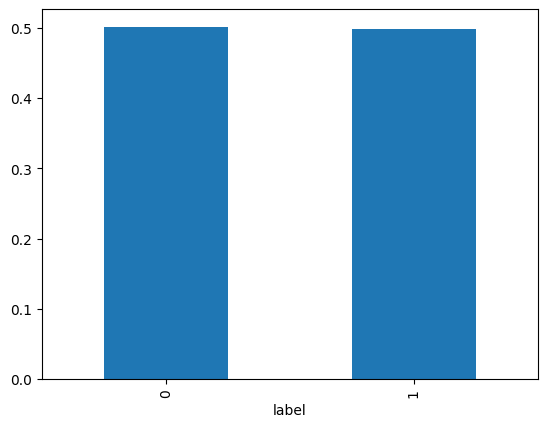

In [ ]:
# check target balance

df['label'].value_counts(normalize = True).plot.bar()

In [ ]:
import nltk

nltk.download('all')

In [ ]:
df.columns

Index(['text', 'label'], dtype='object')

In [ ]:
#@title text preprocessing

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

text = list(df['text'])
lemmatizer = WordNetLemmatizer()
corpus = []

for i in range(len(text)):
    r = re.sub('[^a-zA-Z]', ' ', text[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus.append(r)

df['text'] = corpus
df.head()

,text,label
0,ms netcom com mark singer subject young catche...,0
1,cuz chaos c brandeis edu cousin subject hbp bb...,0
2,j lmsc lmsc lockheed com subject candlestick o...,0
3,tedward c cornell edu edward ted fischer subje...,0
4,snichols adobe com sherri nichols subject youn...,0


In [ ]:
#@title preprocessing the data using tf-idf
"""
Term frequency-inverse document frequency, or TF-IDF, will be used to translate text into numerical vectors.
"""

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Transform the text data to feature vectors
X = vectorizer.fit_transform(df['text'])

# Labels
y = df['label']

In [ ]:
#@title Fit the model for classification - using "support vector machine(SVM)"

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
#@title model evaluation
"""
we will evaluate the model using accuracy score and classification report.
"""
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=newsgroups.target_names)

print(f'Accuracy: {accuracy:.4f}')
print("--------------------------------------")
print('Classification Report:')
print(report)

Accuracy: 0.9950
--------------------------------------
Classification Report:
                    precision    recall  f1-score   support

rec.sport.baseball       0.99      1.00      0.99       286
         sci.space       1.00      0.99      1.00       309

          accuracy                           0.99       595
         macro avg       0.99      1.00      0.99       595
      weighted avg       1.00      0.99      0.99       595



In [ ]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(
    cm, index=newsgroups.target_names, columns=newsgroups.target_names
)

print(df_cm)

,rec.sport.baseball,sci.space
rec.sport.baseball,286,0
sci.space,3,306


In [ ]:
#@title "output prediction"
def predict_category(text):
    """
    Predict the category of a given text using the trained classifier.

    input : text input, vectorizes it using a pre-trained vectorizer
    task : maps the predicted label to its corresponding category name from the newsgroups dataset
    output : predicts its category using a pre-trained classifier
    """
    text_vec = vectorizer.transform([text])
    prediction = clf.predict(text_vec)
    return newsgroups.target_names[prediction[0]]

# Example usage
sample_text = "NASA announced the discovery of new exoplanets."
predicted_category = predict_category(sample_text)
print(f'The predicted category is: {predicted_category}')

The predicted category is: sci.space


In [ ]:
# Example usage
sample_text = """Baseball is a bat-and-ball sport played between two teams of nine players.
The objective is for players to score runs by hitting a ball thrown by the pitcher and circling the four bases on the field. """

predicted_category = predict_category(sample_text)
print(f'The predicted category is: {predicted_category}')

The predicted category is: rec.sport.baseball
